In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean
import matplotlib
%matplotlib inline

In [2]:
multi_dataDIR = '/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y2009m07.1m_Vbottomdegrad.nc'
AZE=xr.open_mfdataset(multi_dataDIR,concat_dim='t', combine='nested')
AZE

<xarray.Dataset>
Dimensions:            (t: 1, y: 1182, x: 1480)
Dimensions without coordinates: t, y, x
Data variables:
    degraded_vomecrty  (t, y, x) float32 dask.array<chunksize=(1, 1182, 1480), meta=np.ndarray>

In [3]:
umean = AZE.degraded_vomecrty.mean(dim='t')
umean

<xarray.DataArray 'degraded_vomecrty' (y: 1182, x: 1480)>
dask.array<mean_agg-aggregate, shape=(1182, 1480), dtype=float32, chunksize=(1182, 1480), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [4]:
dirf='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Vbottomdegrad.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [5]:
nav_lat =ds.nav_lat
nav_lon=ds.nav_lon

In [6]:
umean.shape

(1182, 1480)

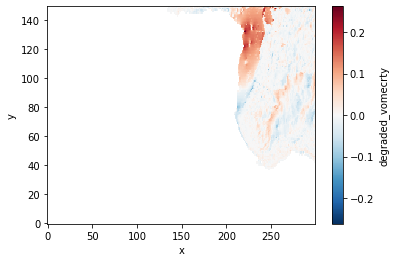

In [7]:
umean[0:150,0:300].plot()

In [8]:
nav_lon.values

array([[-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       [-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       [-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       ...,
       [-99.623726 , -99.56996  , -99.5162   , ...,   8.4034605,
          8.481724 ,   8.559932 ],
       [-99.62991  , -99.57619  , -99.52248  , ...,   8.432922 ,
          8.511225 ,   8.589472 ],
       [-99.63611  , -99.58244  , -99.52876  , ...,   8.462477 ,
          8.540819 ,   8.619106 ]], dtype=float32)

In [9]:
lonmin=-30
lonmax=-10
latmin=50
latmax=60
domain = (lonmin<nav_lon) * (nav_lon<lonmax) * (latmin<nav_lat) * (nav_lat<latmax)
where = np.where(domain)

In [10]:
imin=where[0].min()
imax=where[0].max()
jmin=where[1].min()
jmax=where[1].max()

In [11]:
print(imin,imax,jmin,jmax)

762 1004 1019 1306


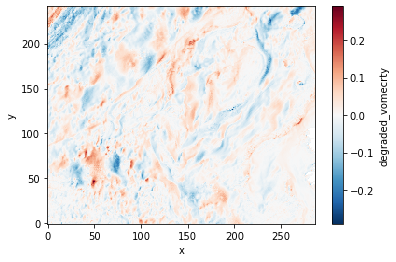

In [12]:
umean[imin:imax,jmin:jmax].plot()

/tmp/ipykernel_117381/3689502039.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Zoom_Moy_v_Vbottom_juillet.png', bbbox_inches='tight')


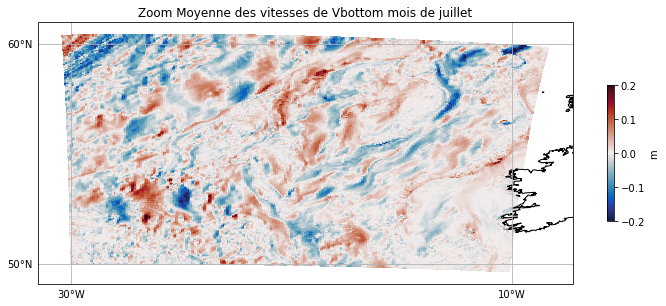

In [35]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(nav_lon[imin:imax,jmin:jmax],nav_lat[imin:imax,jmin:jmax],umean[imin:imax,jmin:jmax],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,vmin=-0.2,vmax=0.2)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Zoom Moyenne des vitesses de Vbottom mois de juillet')
plt.savefig('Zoom_Moy_v_Vbottom_juillet.png', bbbox_inches='tight')


In [14]:
E=umean*umean

In [15]:
E.shape

(1182, 1480)

In [16]:
Ezoom=E[imin:imax,jmin:jmax]
Ezoom.shape

(242, 287)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_117381/996592946.py:22: Matp

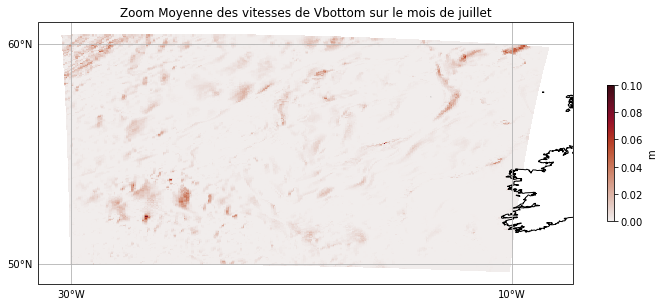

In [34]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(nav_lon[imin:imax,jmin:jmax],nav_lat[imin:imax,jmin:jmax],E[imin:imax,jmin:jmax],transform=ccrs.PlateCarree(),cmap=cmocean.cm.amp,vmin=0,vmax=0.1)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Zoom Moyenne des vitesses de Vbottom sur le mois de juillet')
plt.savefig('Zoom_Moy_v_Vbottom_juillet.png', bbbox_inches='tight')


In [18]:
Ezoom

<xarray.DataArray 'degraded_vomecrty' (y: 242, x: 287)>
dask.array<getitem, shape=(242, 287), dtype=float32, chunksize=(242, 287), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [19]:
m=Ezoom.mean(dim={'x','y'})
m

<xarray.DataArray 'degraded_vomecrty' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [20]:
print(m.values)

0.0014873483


In [21]:
multi_dataDIR2 = '/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y2009m07.1m_Ubottomdegrad.nc'
AZR=xr.open_mfdataset(multi_dataDIR2,concat_dim='t', combine='nested')
AZR

<xarray.Dataset>
Dimensions:            (t: 1, y: 1181, x: 1480)
Dimensions without coordinates: t, y, x
Data variables:
    degraded_vozocrtx  (t, y, x) float32 dask.array<chunksize=(1, 1181, 1480), meta=np.ndarray>

In [22]:
umean2 = AZR.degraded_vozocrtx.mean(dim='t')
umean2

<xarray.DataArray 'degraded_vozocrtx' (y: 1181, x: 1480)>
dask.array<mean_agg-aggregate, shape=(1181, 1480), dtype=float32, chunksize=(1181, 1480), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [23]:
dirf1='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Ubottomdegrad.nc'
ls=xr.open_dataset(dirf,decode_times=False)
ls

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [24]:
nav_lat =ds.nav_lat
nav_lon=ds.nav_lon

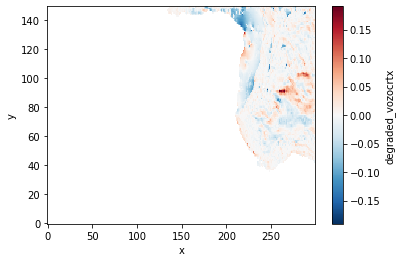

In [25]:
umean2[0:150,0:300].plot()

In [26]:
lonmin=-30
lonmax=-10
latmin=50
latmax=60
domain = (lonmin<nav_lon) * (nav_lon<lonmax) * (latmin<nav_lat) * (nav_lat<latmax)
where = np.where(domain)


In [27]:
imin=where[0].min()
imax=where[0].max()
jmin=where[1].min()
jmax=where[1].max()

In [28]:
print(imin,imax,jmin,jmax)

762 1004 1019 1306


In [29]:
E2=umean2*umean2

In [30]:
Ezoom2=E2[imin:imax,jmin:jmax]
Ezoom2.shape

(242, 287)

In [31]:
m2=Ezoom2.mean(dim={'x','y'})
m2

<xarray.DataArray 'degraded_vozocrtx' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [32]:
print(m2.values)

0.0013950226


In [33]:
Ec=1/2*(m2+m)
print(Ec.values)

0.0014411855
